# Exploring eBay  Used Car Sales Data

## Introduction

We will analyze a dataset of used car sales from the classifieds section of the German eBay website. The original dataset was scraped and uploaded to  Kaggle by the user orgesleka.      
Dataquest(a website that provides courses on data analysis) did some modifications to the original dataset for learning purposes.               
The source of the dataset that we are currently working on is [here](https://data.world/data-society/used-cars-data) 

The data dictionary as follows:                   

dateCrawled - When this ad was first crawled. All field-values are taken from this date.             
name - Name of the car.             
seller - Whether the seller is private or a dealer.             
offerType - The type of listing             
price - The price on the ad to sell the car.             
abtest - Whether the listing is included in an A/B test.             
vehicleType - The vehicle Type.             
yearOfRegistration - The year in which the car was first registered.             
gearbox - The transmission type.             
powerPS - The power of the car in PS.             
model - The car model name.             
odometer - How many kilometers the car has driven.             
monthOfRegistration - The month in which the car was first registered.             
fuelType - What type of fuel the car uses.             
brand - The brand of the car.             
notRepairedDamage - If the car has a damage which is not yet repaired.             
dateCreated - The date on which the eBay listing was created.             
nrOfPictures - The number of pictures in the ad.             
postalCode - The postal code for the location of the vehicle.             
lastSeenOnline - When the crawler saw this ad last online.             

In [1]:
#required package
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

In [2]:
#read csv file as df
autos = pd.read_csv('autos.csv' ,encoding = 'Latin-1')

In [3]:
#explore
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
#no. of rows and columns
autos.shape

(50000, 20)

In [5]:
#quick glance
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

We notice:        
* Some columns have missing values.        
* Some columns have wrong data types such (price and odometer).        
* The column names use camelcase style, however we prefer them to be in snakecase.

In [6]:
#how many duplicated rows?
autos.duplicated().sum()

0

In [7]:
#no. of missing values in each column
autos.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

### Edit Column Name

First, we will change the style of the column names from camelcase into snakecase, that easier to deal with them, plus we will reword some names if require to make them more descriptive.

In [8]:
#print current column names
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [9]:
#new column names
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [10]:
#check
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [11]:
#explore the dataset (categorical and numeric columns) included
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 16:37:21,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


As we've noticed before,       
* The (price) and (odometer) columns should be a numerical data type..    
* (registration_year) column has unrealistic min and max values!!! (min = 1000 ,max = 9999).      
* (registration_month) column has unrealistic min value (min = 0).              

### Correct Data Types

(price) and (odometer) columns are string, we need to convert them into numerical data types.      


First convert (price) into integer

In [12]:
#show up price column
autos['price'].head(10)

0    $5,000
1    $8,500
2    $8,990
3    $4,350
4    $1,350
5    $7,900
6      $300
7    $1,990
8      $250
9      $590
Name: price, dtype: object

In (price) column, we need to remove the $ sign and the comma (,)

In [13]:
#removing & conversion
autos['price'] = (autos['price']
                  .str[1:] #remove the $ 
                  .str.replace(',','') #remove the comma
                  .astype('int')) #convert into int
                  
#check                  
autos['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [14]:
#check the type
autos['price'].dtype

dtype('int64')

Now (odometer) column 

In [15]:
#show current data
autos['odometer'].head()

0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer, dtype: object

In [16]:
#removing & conversion
autos['odometer'] = (autos['odometer']
                  .str.replace('km','') #remove the km
                  .str.replace(',','') #remove the comma
                  .astype('int')) #convert into int
#check
autos['odometer'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int64

In [17]:
#check the type
autos['odometer'].dtype

dtype('int64')

Rename (odometer) column to make it more descriptive.

In [18]:
#rename 
autos.rename({'odometer':'odometer_km'} ,axis = 1 ,inplace = True)

In [19]:
#check
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

After correcting the data types. let's take another look at the descriptive statistics. 

In [20]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 16:37:21,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Before go further,       
* We notice (seller) and (offer_type) columns have almost all of the values are the same,we will drop both columns. 
* (nr_of_pictures),(postal_code), and (abtest) columns won't help us much with our further analyzing and exploring so we will drop them also.

In [21]:
#drop
autos.drop(['seller','offer_type','nr_of_pictures','postal_code','abtest'] ,axis = 1,inplace = True)

In [22]:
autos.head(1)

,date_crawled,name,price,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,2016-04-06 06:45:54


### Exploring The Odometer and Price

In (price) values ,there are somethings strange ,the max value is 100,000,000 !!!

In [23]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [24]:
autos['price'].max()

99999999

It seems the max value has been rounded in the (describe( ) fun), this is highly unrealistic, while the mean value is 9840$

In [25]:
autos['price'].unique().shape

(2357,)

In [26]:
#show price (descending order)
autos['price'].value_counts().sort_index(ascending = False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

In [27]:
autos['price'].value_counts().sort_index().head(20)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64

We have about 13 values that are over or equal to 1 million. In real life, no one is ready to pay millions of dollars to buy a used car through the internet!              
We will remove the outlier values that are over or equal to $1  million.              
About 1,421 prices as 0, no price in life is equal to 0 we will remove them.             
All these 0-priced cars and those extremely expensive represent a very small percent of all the data, so just dropping them can be a reasonable approach.

In [28]:

#When removing outliers , we can do df[(df["col"] > x ) & (df["col"] < y )], 
#but it's more readable to use df[df["col"].between(x,y)]
#left <= series <= right ,,x=left,y=right
#between gives boolean results 
#inclusive >>Include boundaries
autos = autos[autos['price'].between(0,999999,inclusive = False)]


In [29]:
#check
autos['price'].describe()

count     48566.000000
mean       5909.404666
std       10120.652480
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      999990.000000
Name: price, dtype: float64

Now we will explore odometer_km data

In [30]:
autos['odometer_km'].describe()

count     48566.000000
mean     125770.600832
std       39788.379069
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [31]:
autos['odometer_km'].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000, 100000,  40000])

In [32]:
autos['odometer_km'].value_counts(dropna = False).sort_index(ascending = False)

150000    31415
125000     5057
100000     2115
90000      1734
80000      1415
70000      1217
60000      1155
50000      1012
40000       815
30000       780
20000       762
10000       253
5000        836
Name: odometer_km, dtype: int64

That seems this column has preset options that sellers have to choose from.          
There are no outliers in (odometer_km) column...    


### Exploring the date columns

We have five-date columns (date_crawled),(ad_created), and (last_seen) the data type of them is a string. To understand them quantitatively we need to convert them to numerical representation, by using (value_counts(normalize=True) fun) to understand the distribution of the values.        
And the last two columns are (registration_year) and (registration_month) are integers so we need to do nothing before exploring them quantitatively.

let's understand the format of the three first date columns

In [33]:
autos[['date_crawled','ad_created','last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


All represent full timestamp values.

In [34]:
#include date part only 
#normalize=True>that means instead of returning counts,it will be the 
#percent of each unique value makes up of the whole series

#find the percent of each unique date 
autos['date_crawled'].str[:10].value_counts(normalize = True, dropna = False)

2016-04-03    0.038607
2016-03-20    0.037887
2016-03-21    0.037372
2016-03-12    0.036919
2016-03-14    0.036548
2016-04-04    0.036486
2016-03-07    0.036013
2016-04-02    0.035477
2016-03-28    0.034860
2016-03-19    0.034777
2016-03-15    0.034283
2016-03-29    0.034119
2016-03-30    0.033686
2016-04-01    0.033686
2016-03-08    0.033295
2016-03-09    0.033089
2016-03-22    0.032986
2016-03-11    0.032574
2016-03-23    0.032224
2016-03-26    0.032204
2016-03-10    0.032183
2016-03-31    0.031833
2016-03-17    0.031627
2016-03-25    0.031606
2016-03-27    0.031092
2016-03-16    0.029609
2016-03-24    0.029342
2016-03-05    0.025326
2016-03-13    0.015669
2016-03-06    0.014043
2016-04-05    0.013096
2016-03-18    0.012910
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

In [35]:
#find the percent of each unique date
autos['ad_created'].str[:10].value_counts(normalize = True ,dropna = False)

2016-04-03    0.038854
2016-03-20    0.037948
2016-03-21    0.037578
2016-04-04    0.036857
2016-03-12    0.036754
2016-03-14    0.035189
2016-04-02    0.035148
2016-03-28    0.034983
2016-03-07    0.034736
2016-03-29    0.034057
2016-03-15    0.034016
2016-03-19    0.033686
2016-04-01    0.033686
2016-03-30    0.033501
2016-03-08    0.033315
2016-03-09    0.033151
2016-03-11    0.032904
2016-03-22    0.032801
2016-03-26    0.032265
2016-03-23    0.032059
2016-03-10    0.031895
2016-03-31    0.031874
2016-03-25    0.031751
2016-03-17    0.031277
2016-03-27    0.030989
2016-03-16    0.030124
2016-03-24    0.029280
2016-03-05    0.022897
2016-03-13    0.017008
2016-03-06    0.015319
                ...   
2016-02-24    0.000041
2016-01-10    0.000041
2016-02-12    0.000041
2016-02-18    0.000041
2016-02-05    0.000041
2016-02-02    0.000041
2016-02-26    0.000041
2016-02-20    0.000041
2016-02-14    0.000041
2016-02-16    0.000021
2015-12-30    0.000021
2016-02-08    0.000021
2016-02-22 

The highest number of ads created was in two months (March and April).

In [36]:
#find the percent of each unique date
autos['last_seen'].str[:10].value_counts(normalize = True ,dropna = False)

2016-04-06    0.221801
2016-04-07    0.131944
2016-04-05    0.124758
2016-03-17    0.028085
2016-04-03    0.025203
2016-04-02    0.024915
2016-03-30    0.024770
2016-04-04    0.024482
2016-03-12    0.023782
2016-03-31    0.023782
2016-04-01    0.022794
2016-03-29    0.022361
2016-03-22    0.021373
2016-03-28    0.020858
2016-03-20    0.020652
2016-03-21    0.020632
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-23    0.018531
2016-03-26    0.016802
2016-03-16    0.016452
2016-03-15    0.015875
2016-03-19    0.015834
2016-03-27    0.015649
2016-03-14    0.012601
2016-03-11    0.012375
2016-03-10    0.010666
2016-03-09    0.009595
2016-03-13    0.008895
2016-03-08    0.007413
2016-03-18    0.007351
2016-03-07    0.005395
2016-03-06    0.004324
2016-03-05    0.001071
Name: last_seen, dtype: float64

About (22%) of the ads had been seen online was in April/2016 


let's now explore the last two date columns (registration_year) and (registration_month)

In [37]:
autos['registration_year'].describe()

count    48566.000000
mean      2004.755014
std         88.643020
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [38]:
autos['registration_year'].unique()

array([2004, 1997, 2009, 2007, 2003, 2006, 1995, 1998, 2000, 2017, 2010,
       1999, 1982, 1990, 2015, 2014, 1996, 1992, 2002, 2012, 2011, 2005,
       2008, 1985, 2016, 1994, 1986, 2001, 2018, 2013, 1972, 1993, 1988,
       1989, 1973, 1967, 1976, 4500, 1987, 1991, 1983, 1960, 1969, 1950,
       1978, 1980, 1984, 1963, 1977, 1961, 1968, 1934, 1965, 1971, 1966,
       1979, 1981, 1970, 1974, 1910, 1975, 5000, 4100, 2019, 1956, 9999,
       6200, 1964, 1959, 1958, 1800, 1948, 1931, 1943, 1941, 1962, 1927,
       1937, 1929, 1000, 1957, 1952, 1111, 1955, 1939, 8888, 1954, 1938,
       2800, 5911, 1953, 1951, 4800, 1001, 9000])

The max date is 9999 is in the future!               
The min date is 1000, before the cars were invented!              
Based on Google the first automobile was in 1885–1886. So any registration year before that date is unacceptable, and any year after 2016 is an inaccurate date since the date of crawling is in 2016.    


We will count the number of listings with cars that fall outside the 1885 - 2016 interval to see if it is safe to remove them ?!

In [39]:
#no. of rows (dates before 1885)
autos[autos['registration_year'] < 1885].shape[0]

5

In [40]:
#no. of rows (dates after 2016)
autos[autos['registration_year'] > 2016].shape[0]

1879

The percent of outiler values is 3%      
We will remove these rows.

In [41]:
autos = autos[autos['registration_year'].between(1885,2016)]

In [42]:
#check
autos['registration_year'].describe()

count    46682.000000
mean      2002.910372
std          7.185505
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

Exploring the distribution of (registration_year) after deleting wrong dates.

In [43]:
#find the percent of each unique year 
autos['registration_year'].value_counts(normalize = True)

2000    0.067606
2005    0.062894
1999    0.062058
2004    0.057902
2003    0.057817
2006    0.057195
2001    0.056467
2002    0.053254
1998    0.050619
2007    0.048777
2008    0.047449
2009    0.044664
1997    0.041793
2011    0.034767
2010    0.034039
1996    0.029412
2012    0.028062
1995    0.026284
2016    0.026134
2013    0.017201
2014    0.014202
1994    0.013474
1993    0.009104
2015    0.008397
1992    0.007926
1990    0.007433
1991    0.007262
1989    0.003727
1988    0.002892
1985    0.002056
          ...   
1966    0.000471
1976    0.000450
1969    0.000407
1975    0.000386
1965    0.000364
1964    0.000257
1963    0.000171
1959    0.000129
1961    0.000129
1910    0.000107
1956    0.000086
1958    0.000086
1937    0.000086
1962    0.000086
1950    0.000064
1954    0.000043
1941    0.000043
1951    0.000043
1934    0.000043
1957    0.000043
1955    0.000043
1953    0.000021
1943    0.000021
1929    0.000021
1939    0.000021
1938    0.000021
1948    0.000021
1927    0.0000

Any registration year that is between(1998 - 2006 )has 5% of the whole.

Now ,we will have a look at (registration_month) column.

In [44]:
autos['registration_month'].value_counts()

3     4838
6     4119
0     4026
4     3894
5     3877
7     3722
10    3495
12    3263
9     3243
11    3229
1     3105
8     3021
2     2850
Name: registration_month, dtype: int64

0 is the third-highest value as we don't have a month represented as 0, we can assume that some sellers didn't insert the registration month of the car.            
We will keep rows and replace 0 with null values. We don't want to lose useful data for our further analysis.

In [45]:
autos['registration_month'].dtype

dtype('int64')

In [46]:
#replace 0 with null
import numpy as np
autos.loc[autos['registration_month'] == 0,'registration_month'] = np.nan

In [47]:
autos['registration_month'].dtype

dtype('float64')

In [48]:
#find the percent of each unique month 
autos['registration_month'].value_counts(normalize = True , dropna = False)

 3.0     0.103637
 6.0     0.088235
NaN      0.086243
 4.0     0.083415
 5.0     0.083051
 7.0     0.079731
 10.0    0.074868
 12.0    0.069898
 9.0     0.069470
 11.0    0.069170
 1.0     0.066514
 8.0     0.064714
 2.0     0.061051
Name: registration_month, dtype: float64

10% of the cares were registered in the third month (March)

After finishing the assessment of date columns.          
Let's now have a quick look at the rest of the columns.


### Translate Non-English Values

Since this dataset scraped from the german eBay website..it is more than normal to face german words.   
We will translate them to English using map fun . 


In [49]:
#column's values that needed to be translated
autos[['vehicle_type','gearbox','fuel_type','unrepaired_damage']].head()

,vehicle_type,gearbox,fuel_type,unrepaired_damage
0,bus,manuell,lpg,nein
1,limousine,automatik,benzin,nein
2,limousine,manuell,benzin,nein
3,kleinwagen,automatik,benzin,nein
4,kombi,manuell,benzin,nein


In [50]:
autos['vehicle_type'].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [51]:
#translate into English
autos['vehicle_type'] = autos['vehicle_type'].map(
     {'bus':'bus',
     'limousine':'limousine',
     'kleinwagen':'small car',
     'kombi':'combi',
     'coupe':'coupe',
     'suv':'suv',
     'cabrio':'cabrio',
     'andere':'other'})

In [52]:
#check
autos['vehicle_type'].unique()

array(['bus', 'limousine', 'small car', 'combi', nan, 'coupe', 'suv',
       'cabrio', 'other'], dtype=object)

In [53]:
autos['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [54]:
#trnslate
autos['gearbox'] = autos['gearbox'].map({'manuell':'manually',
'automatik':'automatic'})

In [55]:
#check
autos['gearbox'].unique()

array(['manually', 'automatic', nan], dtype=object)

In [56]:
autos['fuel_type'].unique()

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

In [57]:
autos['fuel_type'] = autos['fuel_type'].map({
    'lpg':'lpg',
    'benzin':'petrol',
    'diesel':'diesel',
    'cng':'cng',
    'hybrid':'hybrid',
    'elektro':'electric',
    'andere':'other'
    })

In [58]:
#check
autos['fuel_type'].unique()

array(['lpg', 'petrol', 'diesel', nan, 'cng', 'hybrid', 'electric',
       'other'], dtype=object)

In [59]:
autos['unrepaired_damage'].unique()

array(['nein', nan, 'ja'], dtype=object)

In [60]:
#translate
autos['unrepaired_damage'] = autos['unrepaired_damage'].map({'nein':'no',
                                                            'ja':'yes'})

In [61]:
#check
autos['unrepaired_damage'].unique()

array(['no', nan, 'yes'], dtype=object)

## Data Analyzing



### Exploring Price by Brand         


What is the average price for the brands?

In [62]:
#find the percent of each unique brand 
brands_= autos['brand'].value_counts(normalize = True)
brands_

volkswagen        0.211281
bmw               0.110042
opel              0.107579
mercedes_benz     0.096461
audi              0.086564
ford              0.069898
renault           0.047149
peugeot           0.029840
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008761
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

Most brands don't have a significant percentage in the listing...so we will keep brands that have more than 5% of total listings.

In [63]:
#get top brand names  (>5%)
brands_more_five = brands_[brands_  > 0.05].index
brands_more_five

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

Next step, we will calculate the average price for each of the top brands.

In [64]:
#dic for ave. prices
dic_price = {}

#loop through top brands
for brand in brands_more_five:
    #get the average price of the brand
    mean_ = autos.loc[autos['brand'] == brand,'price'].mean()
    #add the ave. price to the dic as integer
    dic_price[brand] = int(mean_)
    
#sort average prices in descending order   
sorted(dic_price.items(), key = lambda x: x[1], reverse = True) 

[('audi', 9336),
 ('mercedes_benz', 8628),
 ('bmw', 8332),
 ('volkswagen', 5503),
 ('ford', 3749),
 ('opel', 2975)]

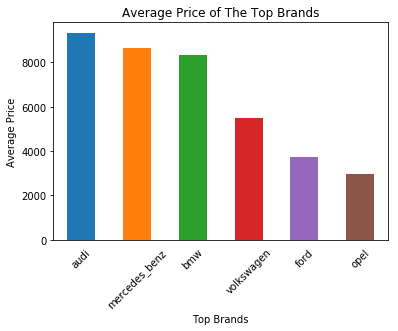

In [76]:
#convert the dic into series to plot it
dic_price = pd.Series(dic_price)
#create a line chart
dic_price.sort_values(ascending = False).plot(kind = 'bar'
                            ,title = 'Average Price of The Top Brands',rot = 45)
plt.xlabel('Top Brands')
plt.ylabel('Average Price')
plt.tick_params(bottom = False)
plt.show()
plt.show()


There is a significant gap in average price between these common and top brands. volkswagen's price has the middle average..while audi,mercedes_benz, and bmw have the highest average.

### Exploring Mileage of The Top Brands

Is there a relationship between ave. price and ave. mileage of the top brands?

In [66]:
#dic for ave. mileage
dic_mileage = {}

#loop through the top brands
for brand in brands_more_five:
    #get the ave. mileage
    mean_ = autos.loc[autos['brand'] == brand,'odometer_km'].mean()
    #add ave. mileage to the dic
    dic_mileage[brand] = int(mean_)
    
dic_mileage

{'volkswagen': 128709,
 'bmw': 132572,
 'opel': 129310,
 'mercedes_benz': 130788,
 'audi': 129157,
 'ford': 124266}

In order to compare the price and mileage, we need to create a new dataframe that contains price and mileage as columns and top brands as indexes .

In [67]:
#make a seriece from the ave. price dic
brand_by_price = pd.Series(dic_price).sort_values(ascending = False)
brand_by_price

audi             9336
mercedes_benz    8628
bmw              8332
volkswagen       5503
ford             3749
opel             2975
dtype: int64

In [68]:
#make a seriece from the ave. mileage dic
brand_by_mile = pd.Series(dic_mileage).sort_values(ascending = False)
brand_by_mile

bmw              132572
mercedes_benz    130788
opel             129310
audi             129157
volkswagen       128709
ford             124266
dtype: int64

In [69]:
#make a dateframe from these 2 serieces
df_brands = pd.DataFrame(brand_by_price ,columns = ['mean_price'])
df_brands

,mean_price
audi,9336
mercedes_benz,8628
bmw,8332
volkswagen,5503
ford,3749
opel,2975


In [70]:
#add the second seriece to the df_brands
df_brands['mean_mileage'] = round(brand_by_mile)
df_brands

,mean_price,mean_mileage
audi,9336,129157
mercedes_benz,8628,130788
bmw,8332,132572
volkswagen,5503,128709
ford,3749,124266
opel,2975,129310


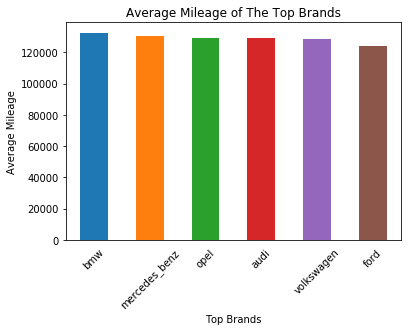

In [74]:
#create a line chart for (mean_mileage)
brand_by_mile.sort_values(ascending = False).plot(kind = 'bar',title ='Average Mileage of The Top Brands'
                                                  ,rot = 45)
plt.xlabel('Top Brands')
plt.ylabel('Average Mileage')
plt.tick_params(bottom = False)
plt.show()

In [ ]:
#create a scatter for (mean_price) and (mean_mileage)
df_brands.plot(y = 'mean_price',x = 'mean_mileage',kind = 'scatter')
plt.show()

We notice there is no significant gap among average mileages as we saw on average prices. However, brands with higher ave. price have a little bit higher mileage.  

### Common Brands/Model Combinations

What are the most common brand/model combinations ?

In [ ]:
#top 5 common brand/model combinations
autos.groupby(['brand','model']).size().nlargest(5)

As we see, the top combinations are german cars.

### Mileage And Price

Is there any relationship and patterns between the mileage and the average prices?

In [ ]:
#get the ave. price for each unique mileage
avg_price_mile = autos.groupby('odometer_km')['price'].mean()
avg_price_mile

In [ ]:
#create a scatter plot
fig ,ax = plt.subplots()

ax.scatter(x = avg_price_mile.index, y = avg_price_mile.values)
#set labels
ax.set_xlabel('ave. mileage')
ax.set_ylabel('ave. price')

plt.show()

We see an expected pattern (inverse relationship), when the mileage is increasing the ave. price is decreasing. 

### Cars With Damage VS Non-damaged (Price)

How much cheaper are cars with damage than their non-damaged ?

In [ ]:
#get the ave. price for damaged cars and non-damaged
autos.groupby('unrepaired_damage')['price'].mean()

In [ ]:
#calcualte the diffrence

#get ave. price of damaged cars
damaged = autos.query("unrepaired_damage == 'yes'")['price'].mean()

#get ave. price of non damaged cars
non_damaged = autos.query("unrepaired_damage == 'no'")['price'].mean()

#get the difference
difference = non_damaged - damaged  
round(difference)

Damaged cars are cheaper than non-damaged about (5000$)

# Conclusion:

* Between the most common brands, there is a significant gap in the average prices. The most expensive brands are Audi, Mercedes-Benz, and BMW.
* Ford and Opel have the lowest average price among the top brands, while Volkswagen gets a moderate average price.        
* In the top brands, there is no significant relationship between average price and average mileage.       
* The top brand/model combinations are german brands : Volkswagen(golf, polo ,and passat) ,BMW(3er) ,and Opel(corsa).       
* There is a pattern between mileage and average price. When the mileage is increasing the average price is decreasing (inverse relationship).      
* Cars with damage are cheaper than non-damaged about (5000$)


## Resources:
https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving              
https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value      
https://stackoverflow.com/questions/53037698/how-can-i-find-the-most-frequent-two-column-combination-in-a-dataframe-in-python